### Внесенные изменения в разобранной на уроке нейронной сети:
- Изменена инициализация весов на np.random.randn для более стабильного обучения.
- Увеличено количество нейронов в скрытом слое до 50 для увеличения емкости модели.
- Увеличено количество итераций до 1000 для более глубокого обучения.
- Исправлены вычисления градиентов и обновления весов в соответствии с обратным распространением ошибки.
- Исправлены вычисления метрик качества на тренировочном и тестовом наборах.

In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape)

(1797, 64)


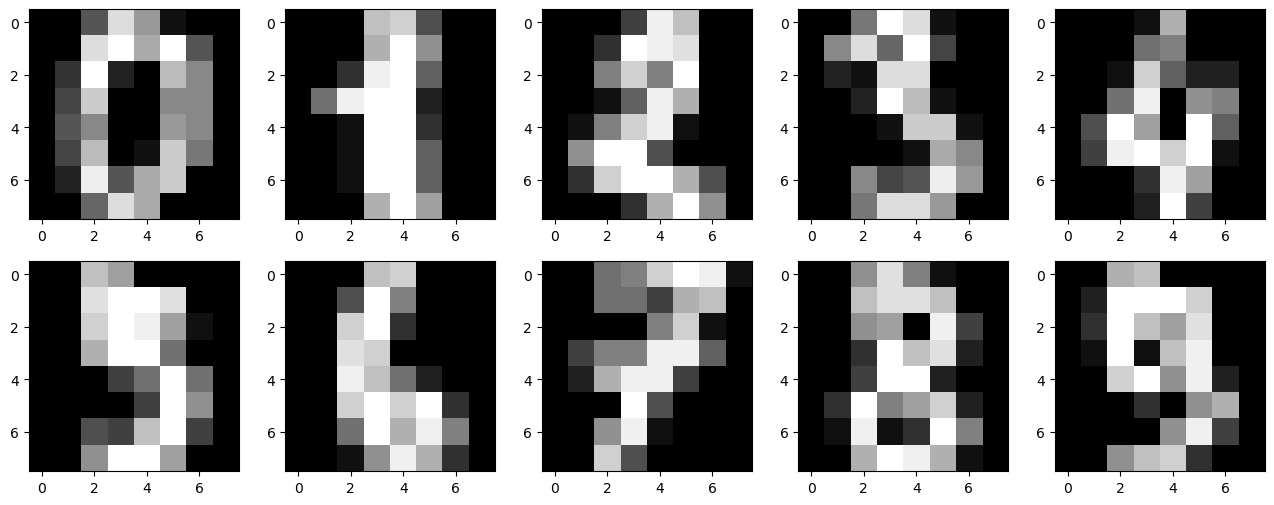

In [4]:
# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i, :].reshape([8, 8]), cmap='gray')

In [5]:
# Обучение нейронной сети

In [6]:
# Функция активации sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
# Производная функции активации sigmoid
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [8]:
# Нормализация входных данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [10]:
# Определим число нейронов скрытого слоя
neuron_numb = 50

In [11]:
# Инициализация случайных весов
np.random.seed(1)
w0 = np.random.randn(64, neuron_numb)  # для входного слоя - 64 входа, neuron_numb выходов
w1 = np.random.randn(neuron_numb, 10)  # для внутреннего слоя - neuron_numb входов, 10 выходов

In [12]:
# Скорость обучения (learning rate)
learning_rate = 0.1

In [13]:
# Количество итераций
num_epochs = 1000

In [14]:
# Массивы для ошибок и метрик, чтобы потом построить графики
errors = []
metrics_train = []
metrics_test = []

In [15]:
# Процесс обучения
for i in range(num_epochs):

    # Прямое распространение (feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # Обратное распространение (back propagation)
    # С использованием градиентного спуска
    layer2_error = layer2 - np.eye(10)[y_train]
    layer2_grad = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_grad.dot(w1.T)
    layer1_grad = layer1_error * sigmoid_deriv(layer1)

    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate

    # Ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)

    # Метрики качества на тренировочном и тестовом наборах
    preds_train = np.argmax(layer2, axis=1)
    accuracy_train = (preds_train == y_train).mean() * 100
    metrics_train.append(accuracy_train)

    layer1_test = sigmoid(np.dot(X_test, w0))
    layer2_test = sigmoid(np.dot(layer1_test, w1))
    preds_test = np.argmax(layer2_test, axis=1)
    accuracy_test = (preds_test == y_test).mean() * 100
    metrics_test.append(accuracy_test)

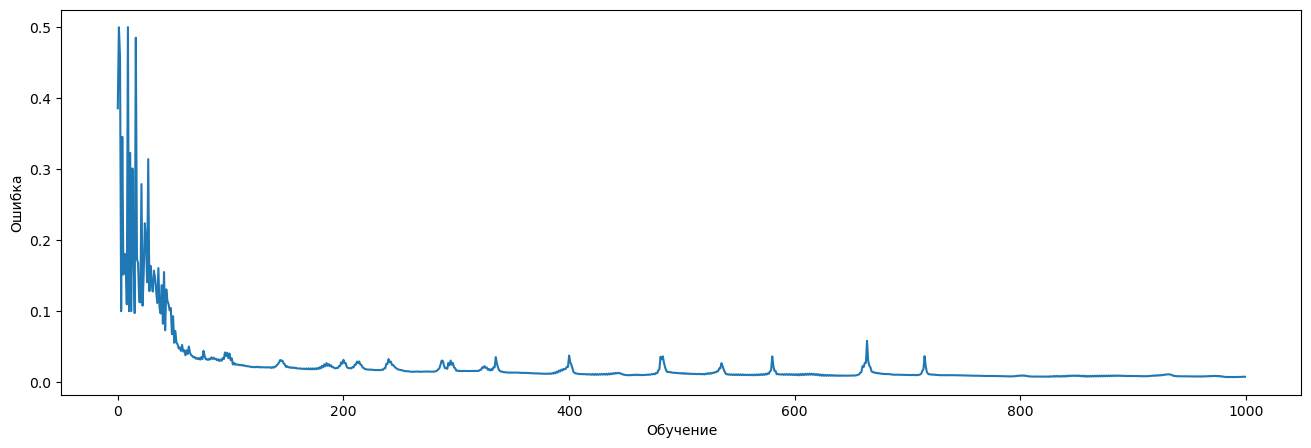

In [16]:
# Демонстрация полученных результатов
# График ошибки
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

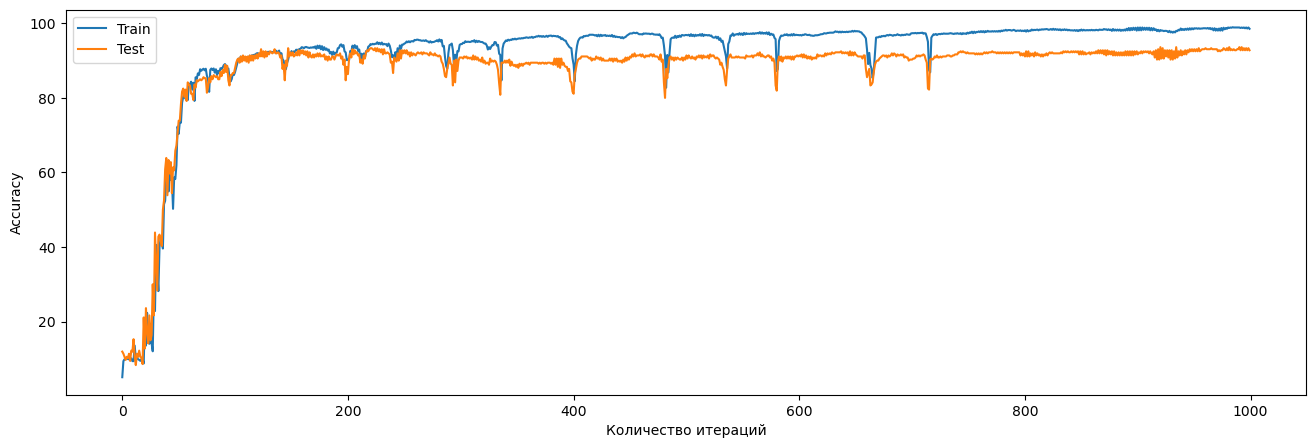

In [17]:
# График точности на тренировочном и тестовом наборах
plt.figure(figsize=(16, 5))
plt.plot(metrics_train, label='Train')
plt.plot(metrics_test, label='Test')
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# Метрика на тренировочном наборе
preds_train = np.argmax(layer2, axis=1)
accuracy_train = (preds_train == y_train).mean() * 100
print(f"Accuracy на тренировочном наборе: {accuracy_train:.2f}%")

Accuracy на тренировочном наборе: 98.54%


In [19]:
# Метрика на тестовом наборе
layer1_test = sigmoid(np.dot(X_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
preds_test = np.argmax(layer2_test, axis=1)
accuracy_test = (preds_test == y_test).mean() * 100
print(f"Accuracy на тестовом наборе: {accuracy_test:.2f}%")

Accuracy на тестовом наборе: 92.78%


### Выводы
#### Факторы, которые могут привести к ухудшению точности нейронной сети:
1. Малое количество нейронов в скрытом слое: Если количество нейронов в скрытом слое слишком мало, нейронная сеть может не иметь достаточной емкости для выявления сложных зависимостей в данных, что может привести к недообучению. Увеличение количества нейронов в скрытом слое может помочь улучшить точность сети.
2. Недостаточное количество итераций обучения: Если количество итераций обучения слишком мало, нейронная сеть может не успеть достичь оптимального состояния и не полностью выучить закономерности в данных. Увеличение количества итераций обучения может улучшить точность сети.
3. Инициализация случайных весов: Неверная инициализация случайных весов может замедлить или затруднить сходимость обучения. В улучшенном коде использовалась инициализация весов с помощью `np.random.randn`, что помогает стабилизировать обучение и улучшить точность.
#### Факторы, которые могут привести к увеличению точности нейронной сети:
1. Увеличение количества нейронов в скрытом слое: Более широкий скрытый слой позволяет нейронной сети выучивать более сложные зависимости между входными и выходными данными.
2. Увеличение количества итераций обучения: Большее количество итераций обучения дает сети больше времени для оптимизации весов и лучшей аппроксимации целевой функции.
3. Правильный выбор функции активации: Выбор подходящей функции активации может помочь нейронной сети моделировать сложные нелинейные зависимости.